In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r'C:\Users\ASHIKA\OneDrive\Documents\dataset\loan.Xlsx')

In [3]:
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [5]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [6]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


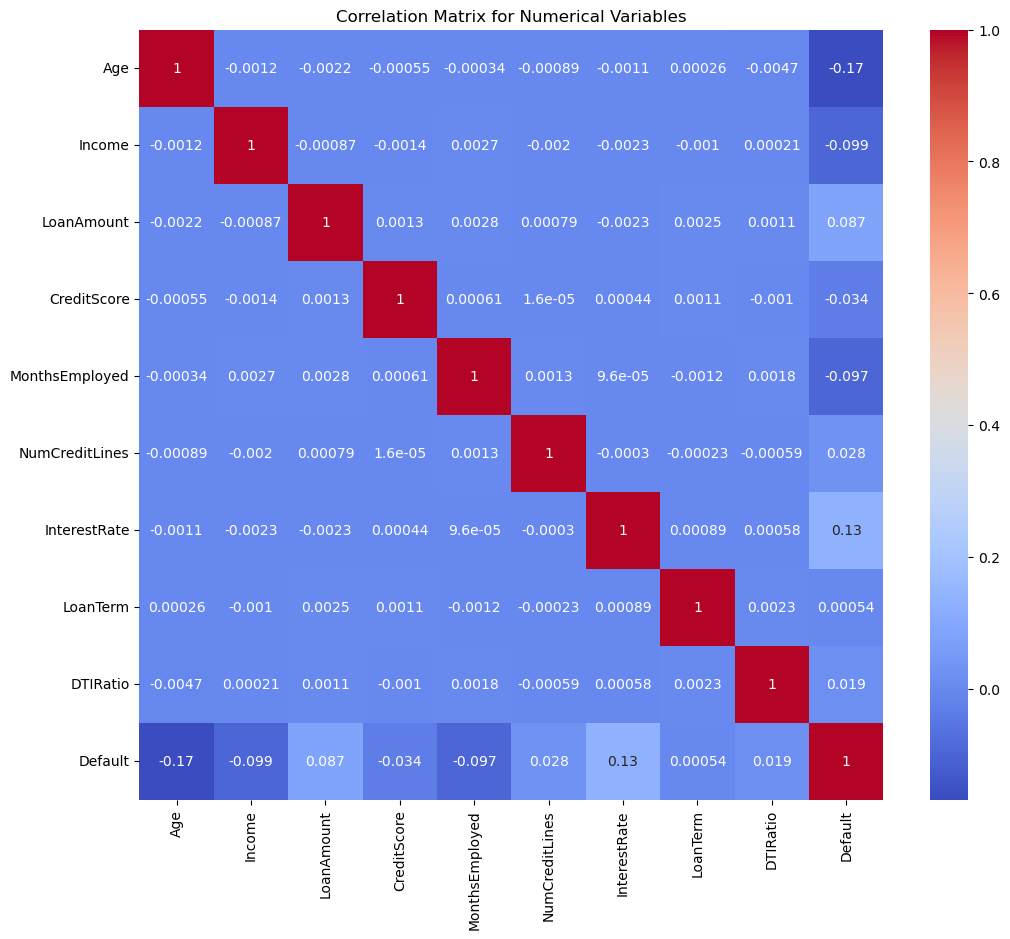

In [7]:
numerical_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 
                 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 
                 'LoanTerm', 'DTIRatio', 'Default'] 
df_numeric = df[numerical_cols]

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix for Numerical Variables")
plt.show()

In [8]:
def detect_outliers_iqr(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outlier_indices = np.where((data < lower_bound) | (data > upper_bound))[0]
    return outlier_indices

numerical_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 
                 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 
                 'LoanTerm', 'DTIRatio'] 

for col in numerical_cols:
    outlier_indices = detect_outliers_iqr(df[col])
    print(f"Outlier indices in {col}: {outlier_indices}")


Outlier indices in Age: []
Outlier indices in Income: []
Outlier indices in LoanAmount: []
Outlier indices in CreditScore: []
Outlier indices in MonthsEmployed: []
Outlier indices in NumCreditLines: []
Outlier indices in InterestRate: []
Outlier indices in LoanTerm: []
Outlier indices in DTIRatio: []


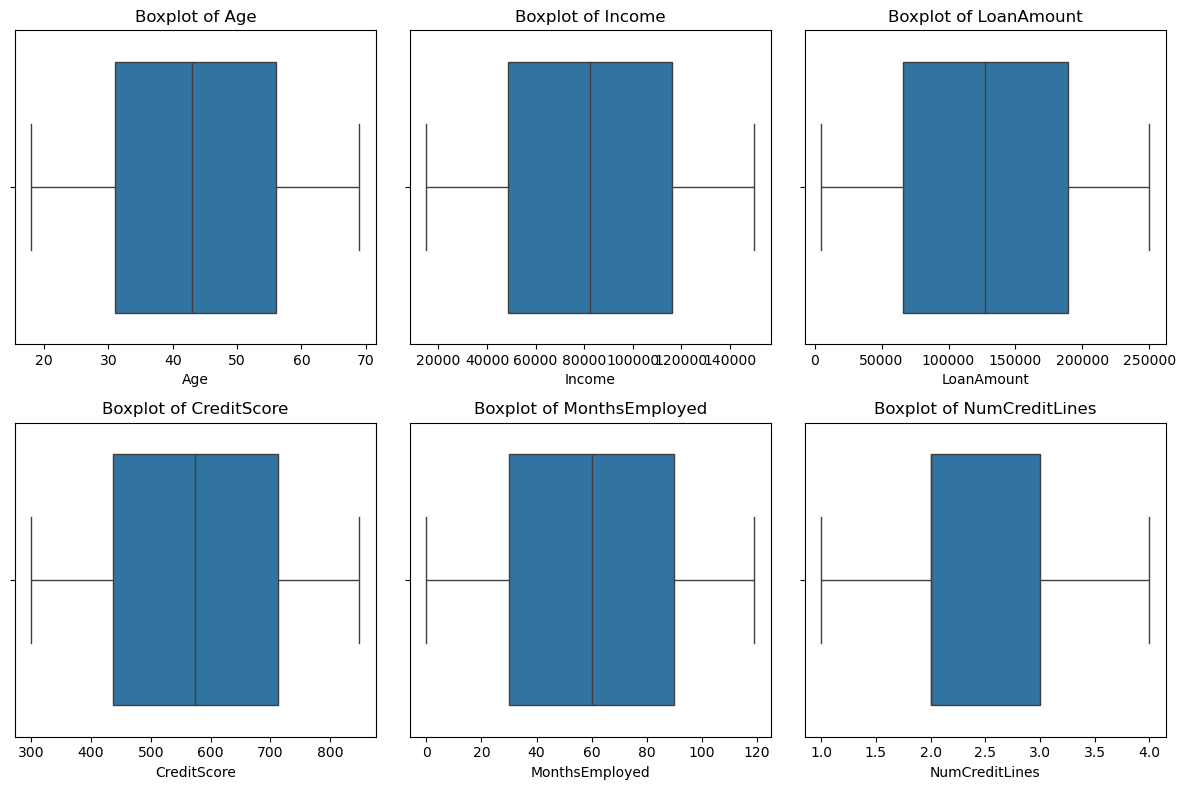

In [9]:
numerical_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 
                 'MonthsEmployed', 'NumCreditLines'] 
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)  # Create subplots for each column
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [10]:
total_defaults = df['Default'].sum()
total_loans = len(df) 
default_rate = (total_defaults / total_loans) * 100

print(f"Overall Default Rate: {default_rate:.2f}%") 

Overall Default Rate: 11.61%


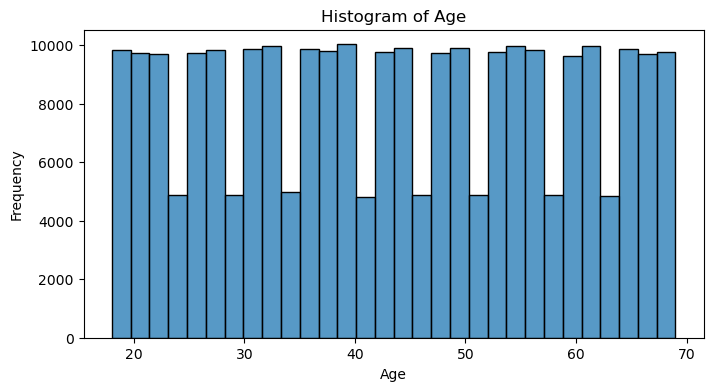

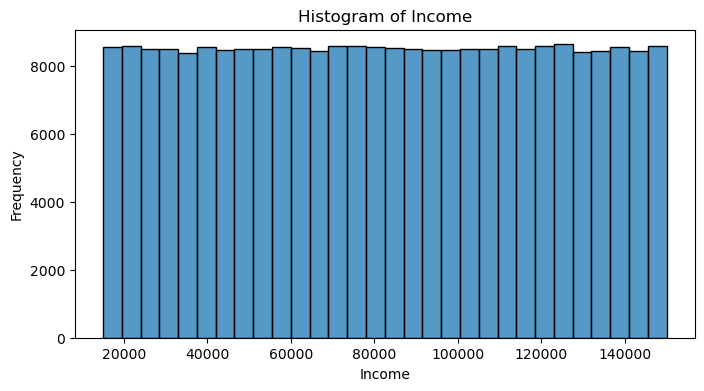

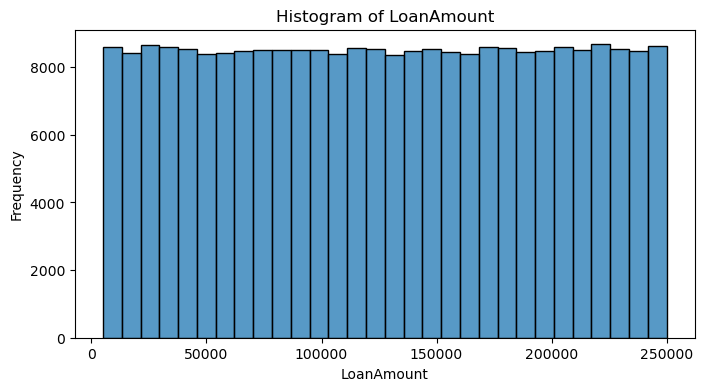

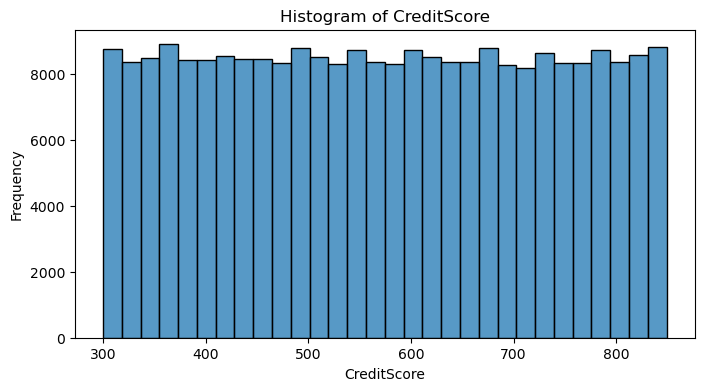

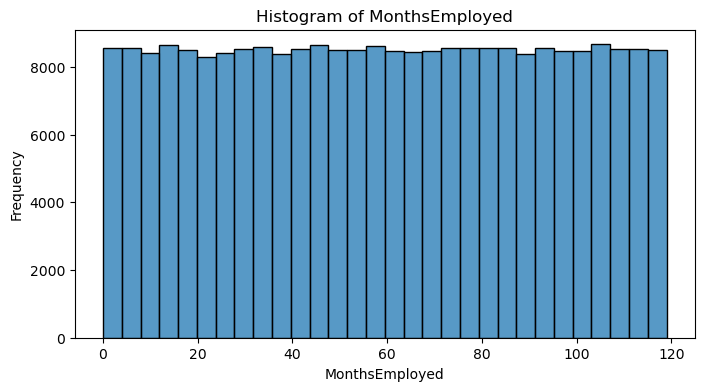

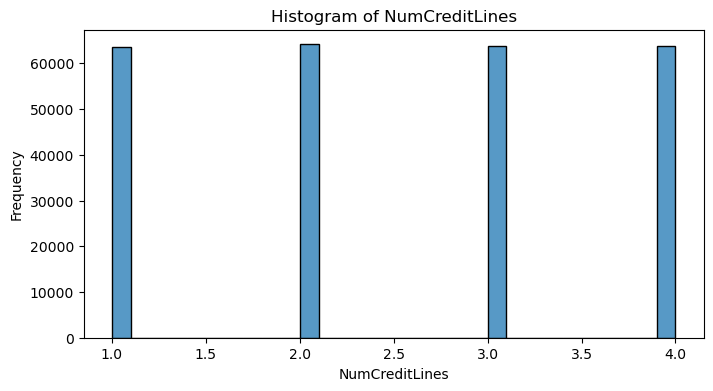

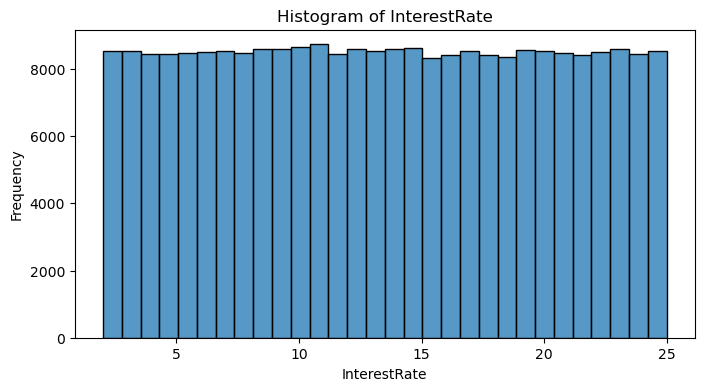

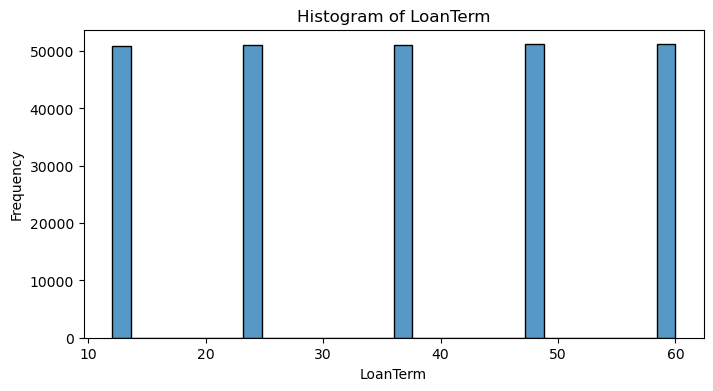

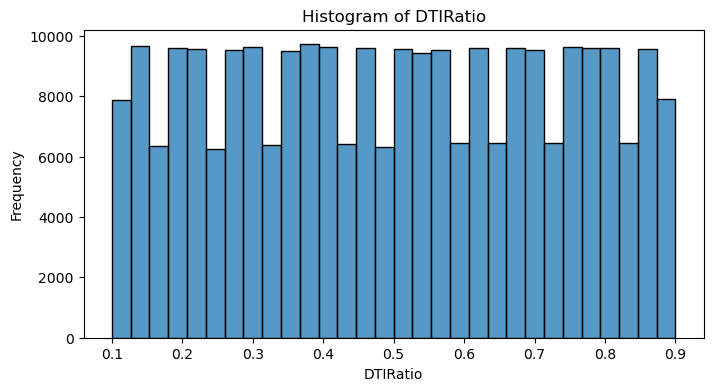

In [11]:
numerical_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 
                 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30) 
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


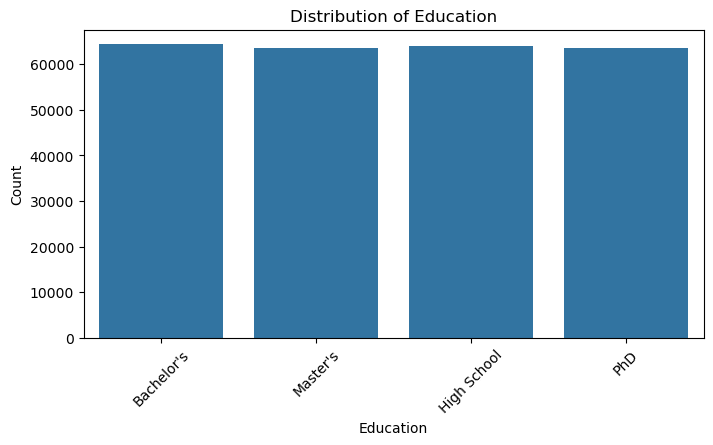

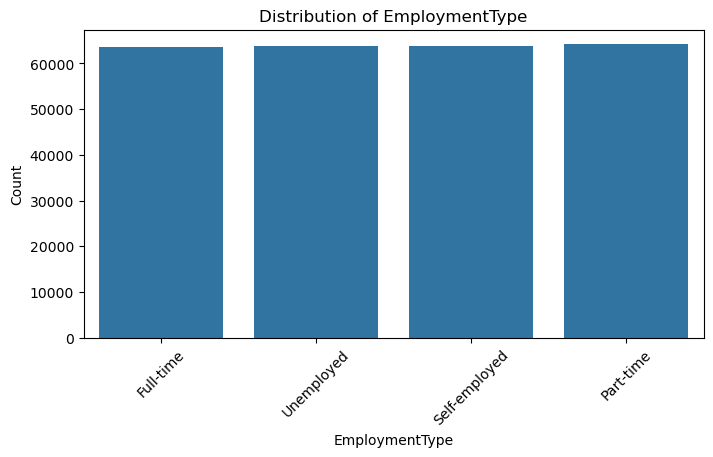

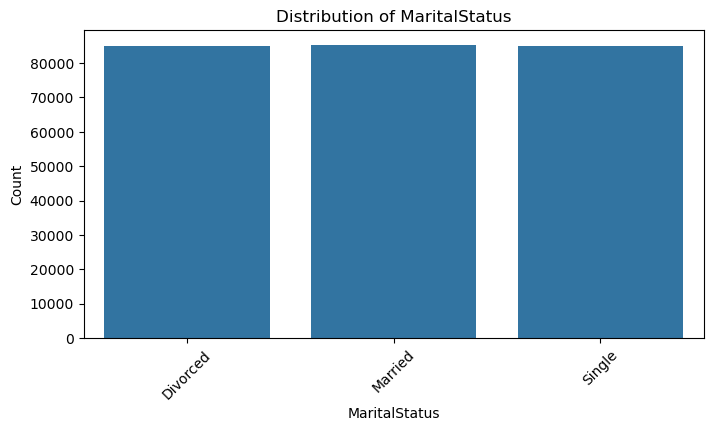

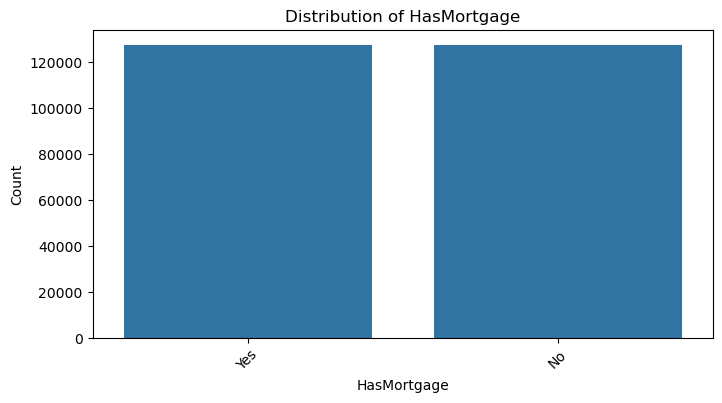

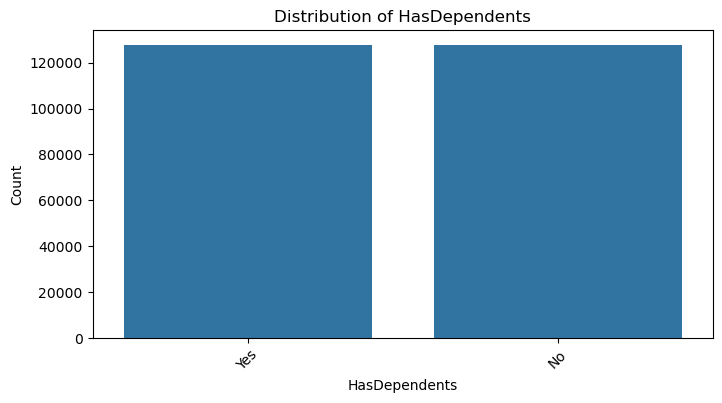

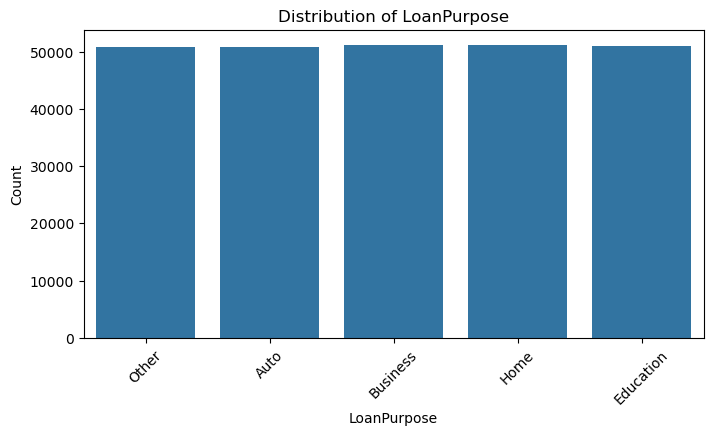

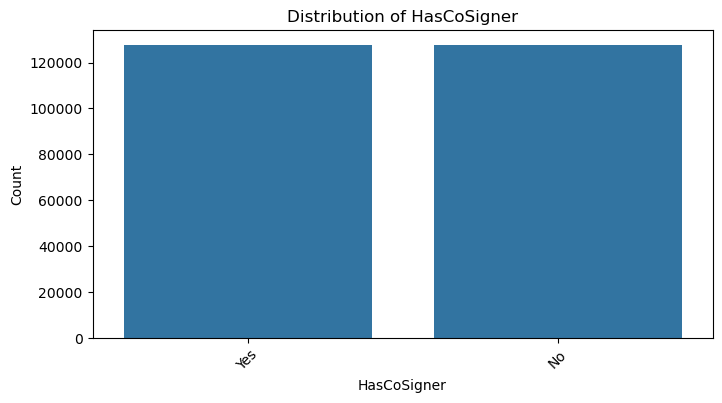

In [12]:
categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 
                   'HasDependents', 'LoanPurpose', 'HasCoSigner']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45) 
    plt.show()


In [14]:
df['Education'].value_counts()

Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

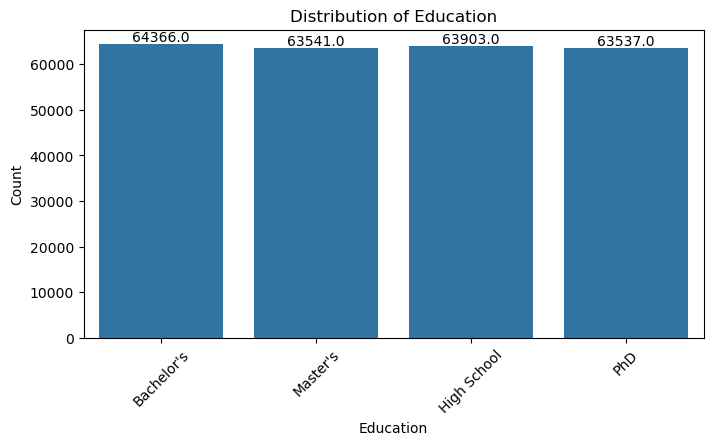

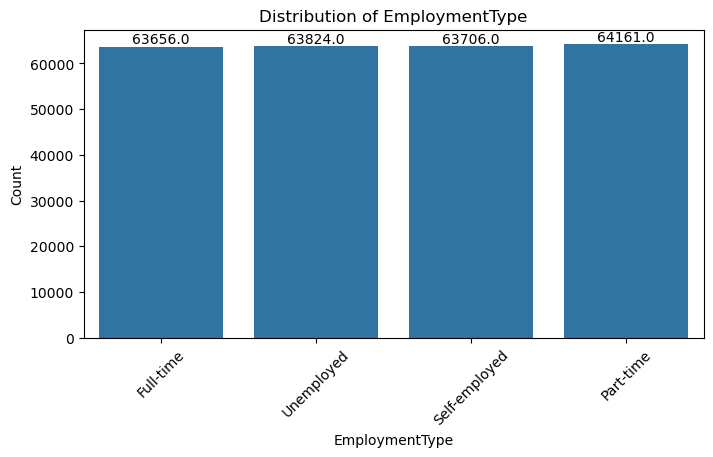

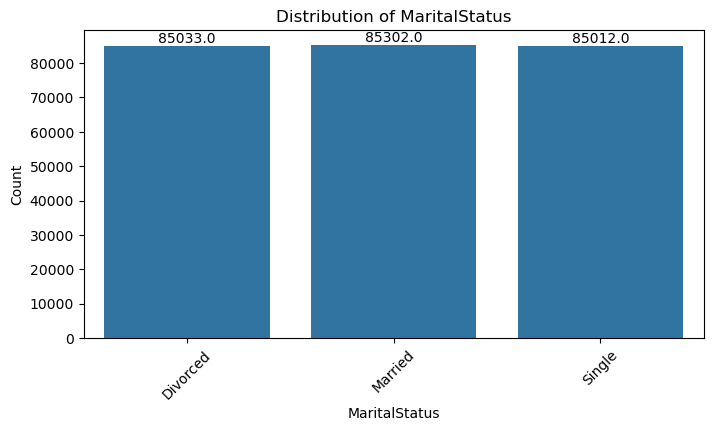

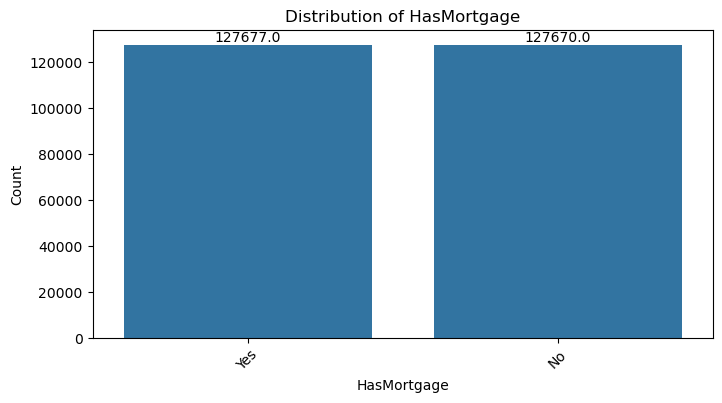

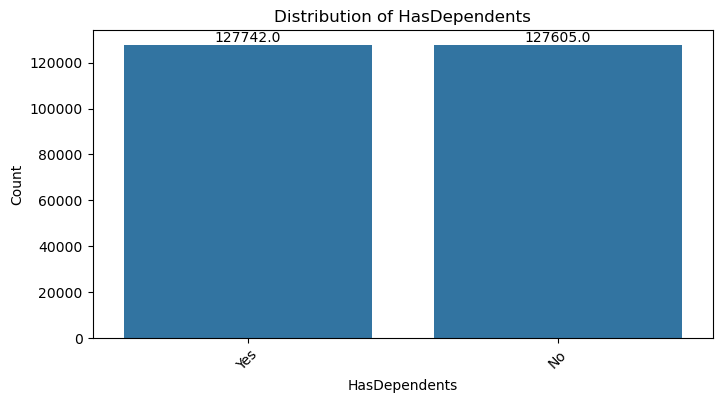

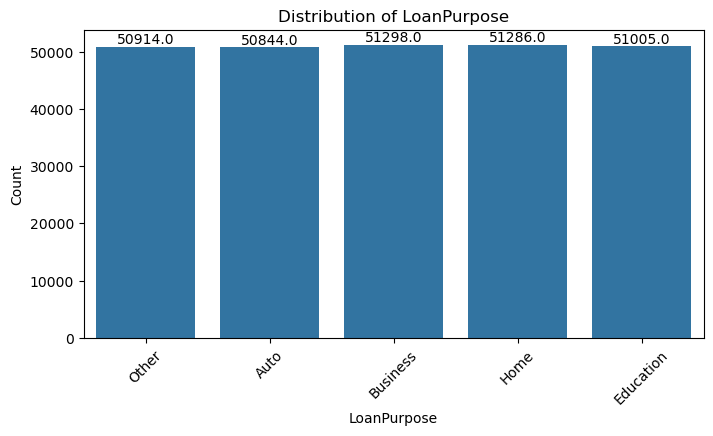

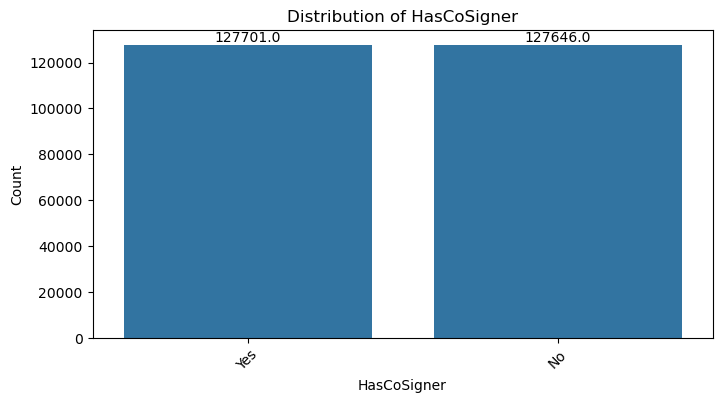

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 
                   'HasDependents', 'LoanPurpose', 'HasCoSigner']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Add count labels on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')
    
    plt.show()


In [18]:
df.to_excel("cleaned_and_analyzed_data.xlsx", index=False) 
print("sucessful !!")

sucessful !!


In [25]:
import os
print(os.getcwd())

C:\Users\ASHIKA


In [26]:
 cd

C:\Users\ASHIKA
